In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns; sns.set(style='whitegrid')

In [46]:
np.random.seed(42)
x = np.arange(-3, 6, .1)
y = .5 * x**3 - 2. * x**2 - x + 1 + np.random.normal(loc=0., 
                                                     scale=3., size=len(x))

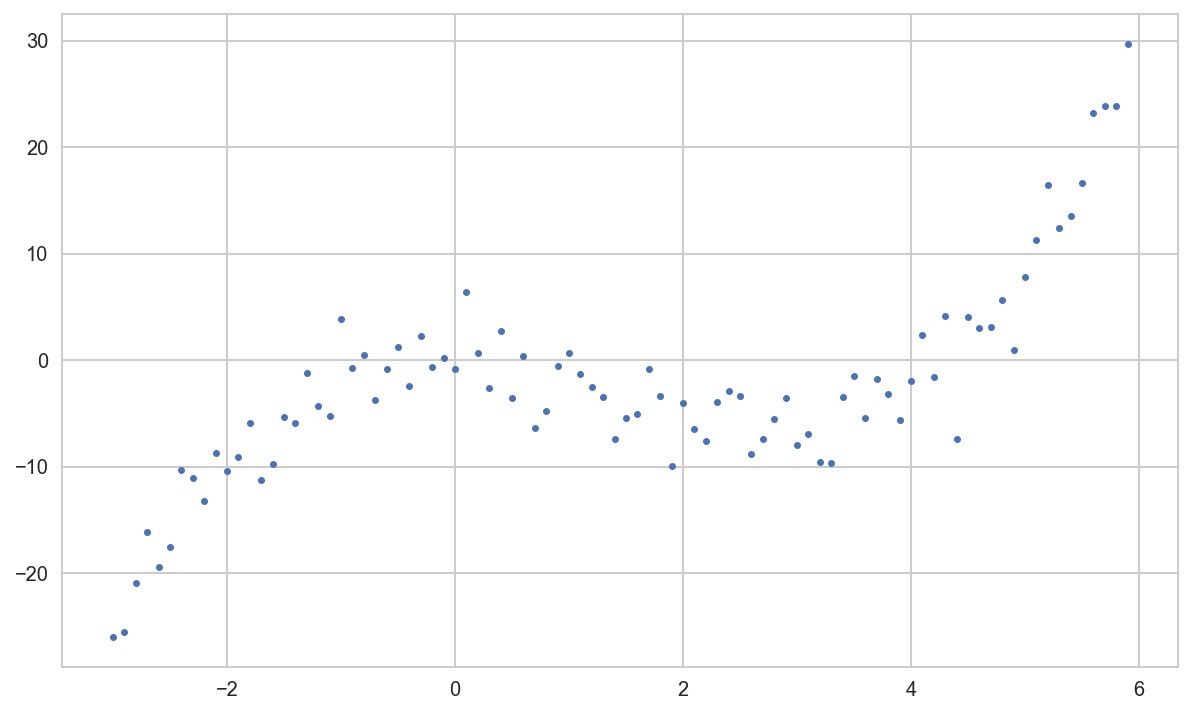

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.');

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

In [91]:
lr.fit(x.reshape(-1, 1), y)
preds_linear = lr.predict(np.arange(-3, 6, .1).reshape(-1, 1))

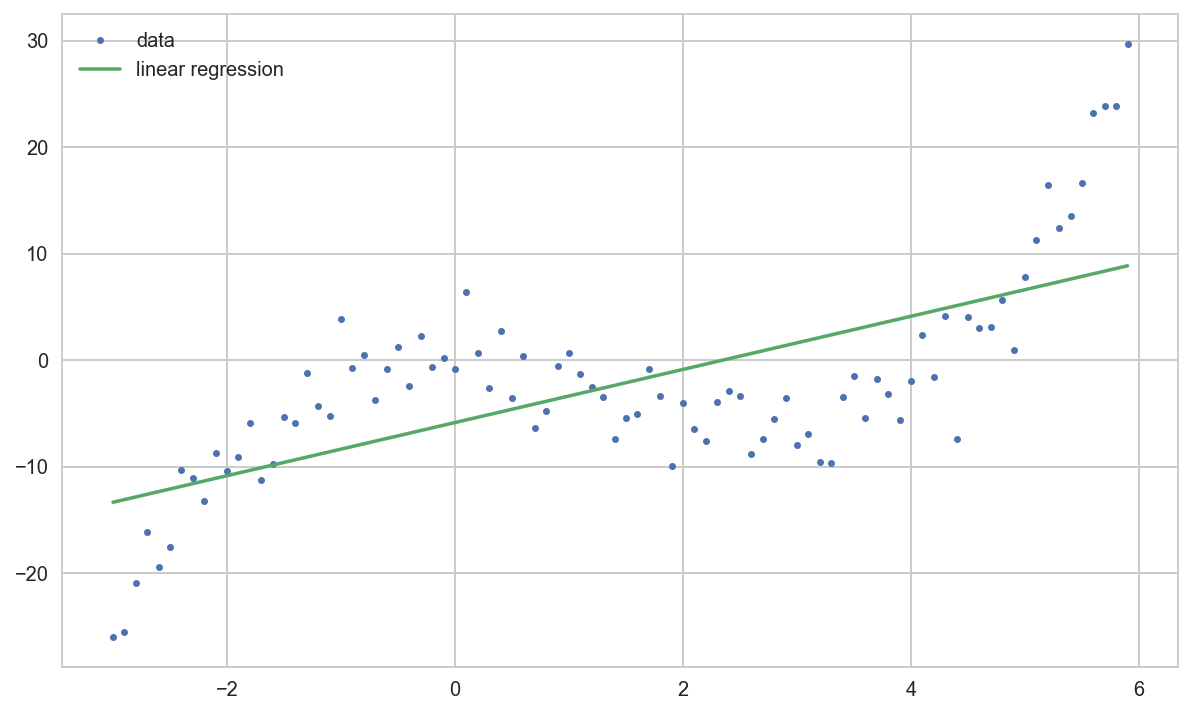

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', label='data')
plt.plot(x, preds_linear, label='linear regression')
plt.legend(loc=0);

In [140]:
X = np.stack((x, x**2, x**3), axis=-1)

In [95]:
lr.fit(X, y)
X_predict = np.stack((np.arange(-3, 6, .1), np.arange(-3, 6, .1)**2,
                      np.arange(-3, 6, .1)**3), axis=-1)
preds_poly = lr.predict(X_predict)

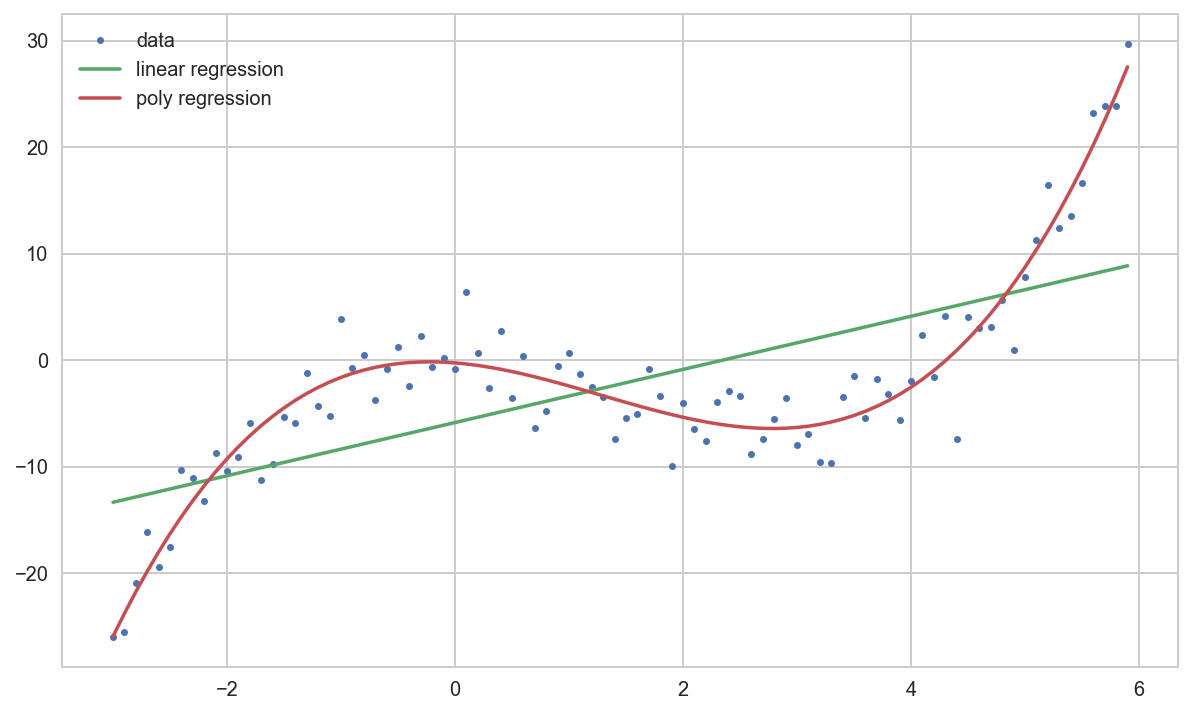

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', label='data')
plt.plot(x, preds_linear, label='linear regression')
plt.plot(x, preds_poly, label='poly regression')
plt.legend(loc=0);

In [92]:
lr.score(x.reshape(-1, 1), y)

0.46056774838280901

In [96]:
lr.score(X, y)

0.91994518522944579

In [113]:
index_test = np.random.choice(np.arange(90), size=10, replace=False)

In [120]:
index_train = np.arange(90)[[i not in index_test for i in np.arange(90)]]

In [128]:
from sklearn.model_selection import KFold

In [129]:
skf = KFold(3, shuffle=True, random_state=0)

In [141]:
all_scores = []

for i in range(2, 20):
    X = []
    for j in range(1, i):
        X.append(x**j)
    X = np.stack(X, axis=-1)
    
    scores = []
    
    for train_index, test_index in skf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        # X_train, X_test = X[train_index], X[test_index]
        # y_train, y_test = y[train_index], y[test_index]
        new_lr = LinearRegression()
        new_lr.fit(X[train_index], y[train_index])
        scores.append(new_lr.score(X[test_index], y[test_index]))
    # print(i - 1)
    all_scores.append(np.mean(scores))

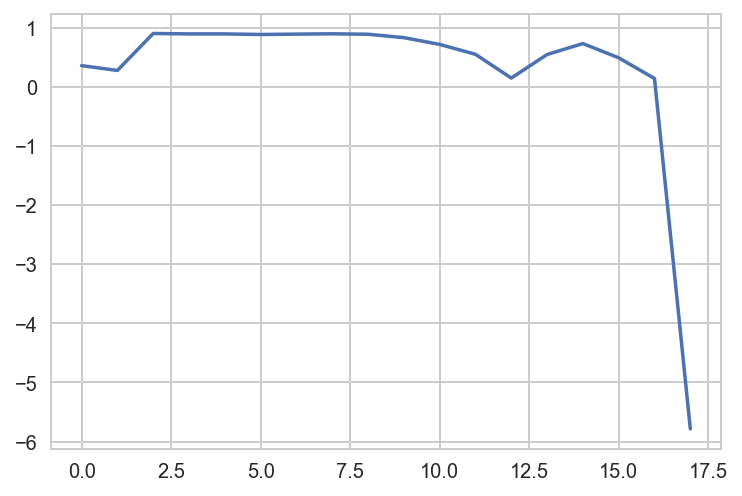

In [142]:
plt.plot(np.arange(len(all_scores)), all_scores);

In [143]:
lr.fit(X, y)
# X_predict = np.stack(X, axis=-1)
preds_poly_8 = lr.predict(X)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


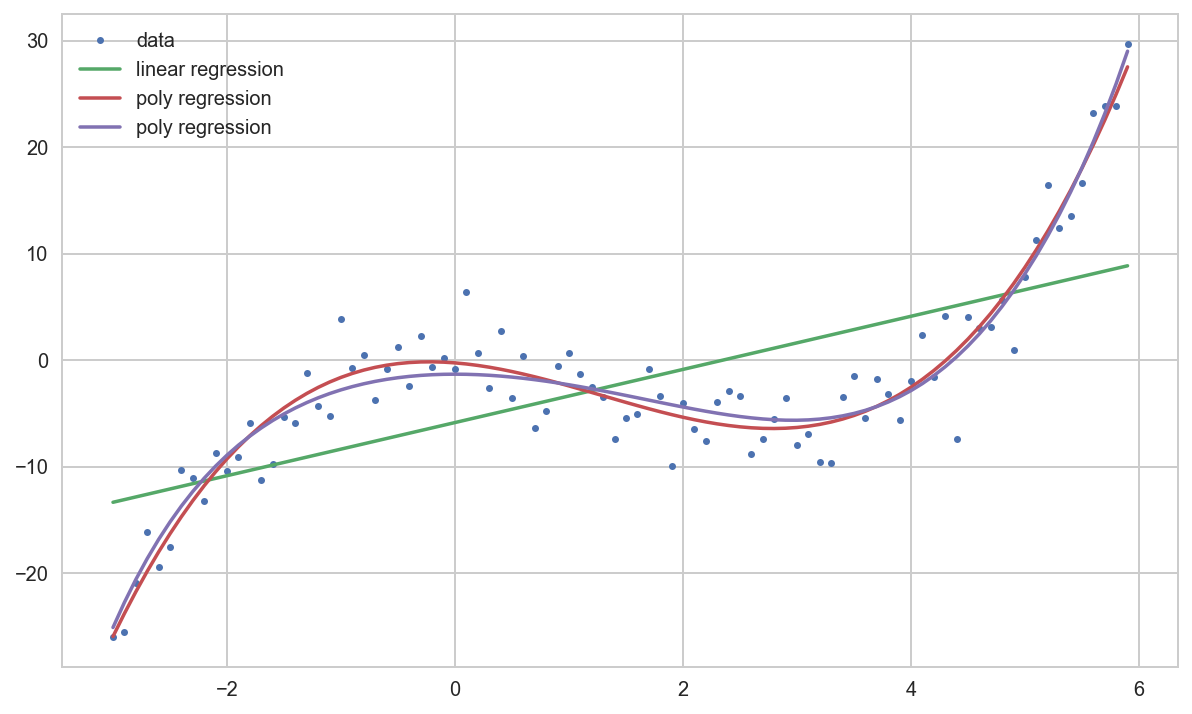

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', label='data')
plt.plot(x, preds_linear, label='linear regression')
plt.plot(x, preds_poly, label='poly regression')
plt.plot(x, preds_poly_8, label='poly regression')
plt.legend(loc=0);

In [138]:
from sklearn.linear_model import Lasso, Ridge

In [176]:
lr = Ridge(alpha=20.)
lr.fit(X, y)
# X_predict = np.stack((np.arange(-3, 6, .1), np.arange(-3, 6, .1)**2,
#                       np.arange(-3, 6, .1)**3), axis=-1)
preds_poly = lr.predict(X)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0217173538357034e-27 / 1.1102230246251565e-16
  RuntimeWarning)


In [177]:
lr.coef_

array([ -2.69196101e-01,  -4.91482209e-01,  -9.46464388e-02,
        -5.40557837e-01,   1.51581796e-01,  -3.09648062e-01,
         1.97565528e-01,   1.66575999e-01,  -1.16512859e-01,
        -1.71270107e-02,   2.25415391e-02,  -1.75330007e-03,
        -1.69324663e-03,   3.79762329e-04,   2.05972568e-05,
        -1.57449600e-05,   1.92526260e-06,  -7.84957758e-08])

In [178]:
pred_coeff

array([ -3.42076057e-01,  -1.31888949e+00,  -2.03179615e+00,
        -1.68358116e+00,   2.57518851e+00,   6.23263485e-01,
        -9.86811228e-01,  -2.55183059e-02,   1.74310450e-01,
        -1.83377356e-02,  -1.43826082e-02,   3.05589380e-03,
         4.07961896e-04,  -1.69369749e-04,   7.63570229e-06,
         2.50897422e-06,  -3.48996675e-07,   1.35303159e-08])

In [175]:
pred_coeff = lr.coef_

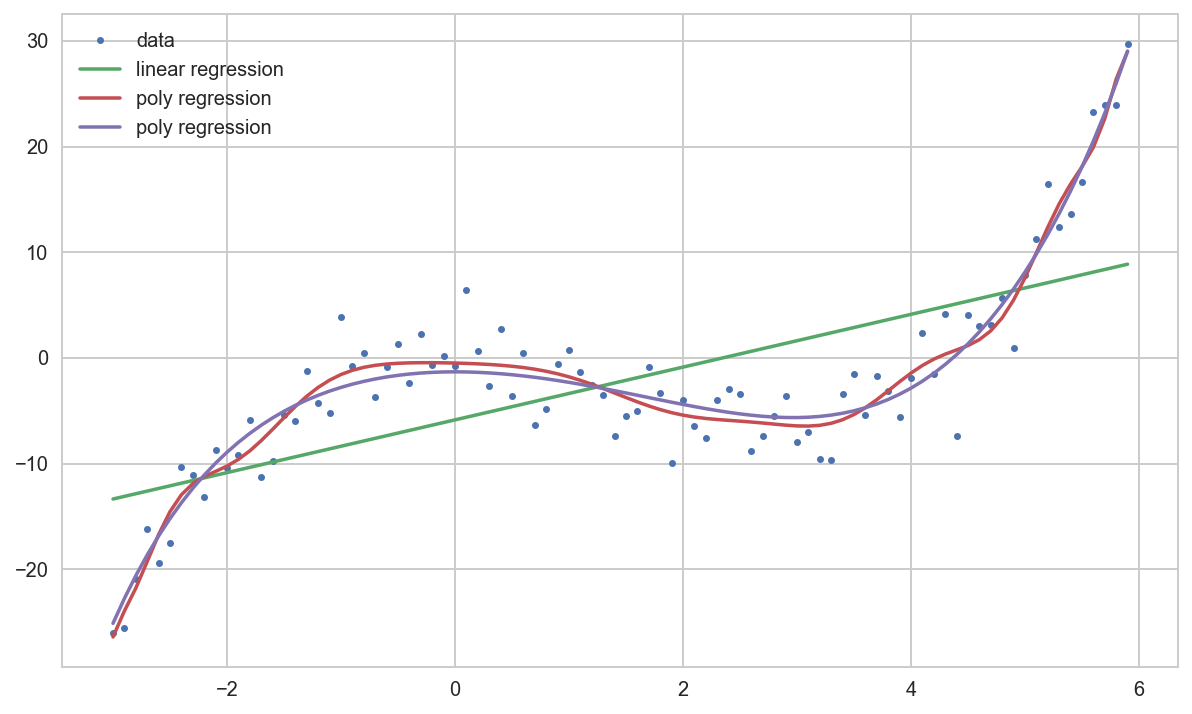

In [179]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', label='data')
plt.plot(x, preds_linear, label='linear regression')
plt.plot(x, preds_poly, label='poly regression')
plt.plot(x, preds_poly_8, label='poly regression')
plt.legend(loc=0);

In [190]:
all_scores = []
all_scores_l1 = []
all_scores_l2 = []

for i in range(2, 22):
    X = []
    for j in range(1, i):
        X.append(x**j)
    X = np.stack(X, axis=-1)
    
    scores = []
    scores_l1 = []
    scores_l2 = []
    
    for train_index, test_index in skf.split(X):
        new_lr = LinearRegression()
        new_lr.fit(X[train_index], y[train_index])
        scores.append(new_lr.score(X[test_index], y[test_index]))
        
        l1_lr = Lasso(alpha=10.)
        l1_lr.fit(X[train_index], y[train_index])
        scores_l1.append(l1_lr.score(X[test_index], y[test_index]))
        
        l2_lr = Ridge(alpha=10.)
        l2_lr.fit(X[train_index], y[train_index])
        scores_l2.append(l2_lr.score(X[test_index], y[test_index]))
    # print(i - 1)
    all_scores.append(np.mean(scores))
    all_scores_l1.append(np.mean(scores_l1))
    all_scores_l2.append(np.mean(scores_l2))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.4637164471290176e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7587360930074375e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

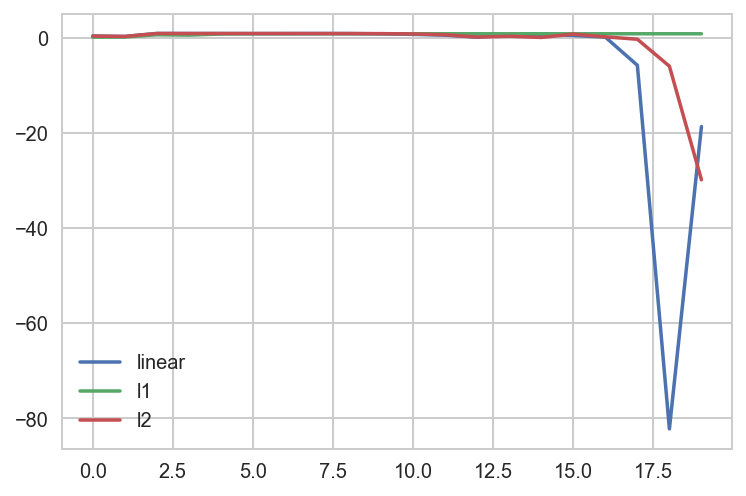

In [191]:
plt.plot(np.arange(len(all_scores)), all_scores, label='linear')
plt.plot(np.arange(len(all_scores)), all_scores_l1, label='l1')
plt.plot(np.arange(len(all_scores)), all_scores_l2, label='l2')
plt.legend();